In [14]:
import os
import sys

notebook_dir = os.path.abspath('') # get the current notebook directory
sys.path.append(os.path.join(notebook_dir, '..', 'src')) # add src folder to path to import modules
                                                        # '..', 'src' if you are in the 'examples' folder

In [15]:
%load_ext autoreload
%autoreload 2

## Training Time

It simply monitors the model's training time.

In [3]:
from rapidae.data import load_dataset
from rapidae.models import AE
from rapidae.models.callbacks import TrainingTime
from rapidae.pipelines import TrainingPipeline

In [4]:
data = load_dataset('MNIST')

# Normalize data and flatten images
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1).astype("float32") / 255
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1).astype("float32") / 255

input_dim = x_train.shape[1]

2024-04-05 12:11:51 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-05 12:11:52 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-05 12:11:52 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-05 12:11:52 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-04-05 12:11:52 [INFO]: Deleting MNIST data...


In [5]:
model = AE(input_dim=input_dim)

2024-04-05 12:11:53 [INFO]: Trying to set encoder and decoder from child class...
2024-04-05 12:11:53 [WARNING]: No encoder found in ae, using default encoder with layers_conf=[512]...
2024-04-05 12:11:53 [WARNING]: No decoder found in ae, using default decoder with layers_conf=[512]...


In [6]:
pipe = TrainingPipeline(name='vanilla_autoencoder', learning_rate=0.001,
                        model=model, num_epochs=20, batch_size=128,
                        callbacks=[TrainingTime()])

trained_model = pipe(x=x_train)

2024-04-05 12:11:54 [INFO]: +++ vanilla_autoencoder +++
2024-04-05 12:11:54 [INFO]: Creating folder in ./output_dir/vanilla_autoencoder_2024-04-05_12-11-54
2024-04-05 12:11:54 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['TrainingTime', 'EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/20

Epoch 1: loss improved from inf to 0.08596, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-11-54/model.weights.h5
469/469 - 4s - 8ms/step - loss: 0.0860
Epoch 2/20

Epoch 2: loss improved from 0.08596 to 0.06738, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-11-54/model.weights.h5
469/469 - 3s - 5ms/step - loss: 0.0674
Epoch 3/20

Epoch 3: loss improved from 0.06738 to 0.06732, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-11-54/model.weights.h5
469/469 - 2s - 5ms/step - loss: 0.0673
Epoch 4/20

Epoch 4: loss improved from 0.06732 to 0.06731, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-11-54/model.weights.h5
469/469 - 2s - 5ms/step - loss: 0.0673
Epoch 5/20

Epoch 5: loss improved from 0.06731 to 0.06730, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-11-54/model.weights.h5
469/469 - 3s - 5ms/step - loss: 0.0673
Epoch 6/20

Epoch 6: loss improved from 0.06730 to 0.06730, saving model to ./o

2024-04-05 12:12:45 [INFO]: Training time: 00:00:50
2024-04-05 12:12:45 [INFO]: Restoring best model
2024-04-05 12:12:45 [INFO]: Best model restored


## Save visualizations

Sometimes you may want to save the latent space or reconstructions of your model when training, so this callback gets you covered.

In [16]:
from rapidae.data import load_dataset
from rapidae.models import AE
from rapidae.models.callbacks import save_visualizations
from rapidae.pipelines import TrainingPipeline

In [17]:
data = load_dataset('MNIST')

# Normalize data and flatten images
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1).astype("float32") / 255
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1).astype("float32") / 255
y_train = data['y_train']

input_dim = x_train.shape[1]

2024-04-05 12:29:31 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-05 12:29:31 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-05 12:29:31 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-05 12:29:31 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-04-05 12:29:31 [INFO]: Deleting MNIST data...


In [18]:
model = AE(input_dim=input_dim)

2024-04-05 12:29:33 [INFO]: Trying to set encoder and decoder from child class...
2024-04-05 12:29:33 [WARNING]: No encoder found in ae, using default encoder with layers_conf=[512]...
2024-04-05 12:29:33 [WARNING]: No decoder found in ae, using default decoder with layers_conf=[512]...


In [24]:
pipe = TrainingPipeline(name='vanilla_autoencoder', learning_rate=0.001,
                        model=model, num_epochs=20, batch_size=128,
                        callbacks=[save_visualizations(model, x_train, y_train, type='image')])

trained_model = pipe(x=x_train)

2024-04-05 12:36:11 [INFO]: +++ vanilla_autoencoder +++
2024-04-05 12:36:11 [INFO]: Creating folder in ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11
2024-04-05 12:36:11 [INFO]: Setting path to output_dir


2024-04-05 12:36:11 [INFO]: 
TRAINING STARTED
	Backend: tensorflow
	Eager mode: False
	Validation data available: False
	Callbacks set: ['save_visualizations', 'EarlyStopping', 'ModelCheckpoint'] 



Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:36:21 [INFO]: Saving latent space plot...
2024-04-05 12:36:24 [INFO]: Saving reconstructions plot...



Epoch 1: loss improved from inf to 0.04586, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 13s - 28ms/step - loss: 0.0459
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:36:33 [INFO]: Saving latent space plot...
2024-04-05 12:36:36 [INFO]: Saving reconstructions plot...



Epoch 2: loss improved from 0.04586 to 0.04512, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0451
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:36:45 [INFO]: Saving latent space plot...
2024-04-05 12:36:48 [INFO]: Saving reconstructions plot...



Epoch 3: loss improved from 0.04512 to 0.04445, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0444
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:36:57 [INFO]: Saving latent space plot...
2024-04-05 12:37:00 [INFO]: Saving reconstructions plot...



Epoch 4: loss improved from 0.04445 to 0.04390, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 13s - 27ms/step - loss: 0.0439
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:37:09 [INFO]: Saving latent space plot...
2024-04-05 12:37:12 [INFO]: Saving reconstructions plot...



Epoch 5: loss improved from 0.04390 to 0.04342, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0434
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:37:21 [INFO]: Saving latent space plot...
2024-04-05 12:37:24 [INFO]: Saving reconstructions plot...



Epoch 6: loss improved from 0.04342 to 0.04305, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0431
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:37:32 [INFO]: Saving latent space plot...
2024-04-05 12:37:36 [INFO]: Saving reconstructions plot...



Epoch 7: loss improved from 0.04305 to 0.04271, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0427
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:37:44 [INFO]: Saving latent space plot...
2024-04-05 12:37:47 [INFO]: Saving reconstructions plot...



Epoch 8: loss improved from 0.04271 to 0.04242, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0424
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:37:56 [INFO]: Saving latent space plot...
2024-04-05 12:38:00 [INFO]: Saving reconstructions plot...



Epoch 9: loss improved from 0.04242 to 0.04215, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 27ms/step - loss: 0.0421
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:38:09 [INFO]: Saving latent space plot...
2024-04-05 12:38:12 [INFO]: Saving reconstructions plot...



Epoch 10: loss improved from 0.04215 to 0.04189, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0419
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:38:20 [INFO]: Saving latent space plot...
2024-04-05 12:38:23 [INFO]: Saving reconstructions plot...



Epoch 11: loss improved from 0.04189 to 0.04166, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0417
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:38:33 [INFO]: Saving latent space plot...
2024-04-05 12:38:36 [INFO]: Saving reconstructions plot...



Epoch 12: loss improved from 0.04166 to 0.04145, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 26ms/step - loss: 0.0414
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:38:44 [INFO]: Saving latent space plot...
2024-04-05 12:38:47 [INFO]: Saving reconstructions plot...



Epoch 13: loss improved from 0.04145 to 0.04122, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0412
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:38:56 [INFO]: Saving latent space plot...
2024-04-05 12:38:59 [INFO]: Saving reconstructions plot...



Epoch 14: loss improved from 0.04122 to 0.04102, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0410
Epoch 15/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:39:08 [INFO]: Saving latent space plot...
2024-04-05 12:39:11 [INFO]: Saving reconstructions plot...



Epoch 15: loss improved from 0.04102 to 0.04084, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0408
Epoch 16/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:39:20 [INFO]: Saving latent space plot...
2024-04-05 12:39:23 [INFO]: Saving reconstructions plot...



Epoch 16: loss improved from 0.04084 to 0.04067, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 26ms/step - loss: 0.0407
Epoch 17/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:39:32 [INFO]: Saving latent space plot...
2024-04-05 12:39:35 [INFO]: Saving reconstructions plot...



Epoch 17: loss improved from 0.04067 to 0.04052, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0405
Epoch 18/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:39:44 [INFO]: Saving latent space plot...
2024-04-05 12:39:47 [INFO]: Saving reconstructions plot...



Epoch 18: loss improved from 0.04052 to 0.04037, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0404
Epoch 19/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:39:56 [INFO]: Saving latent space plot...
2024-04-05 12:39:59 [INFO]: Saving reconstructions plot...



Epoch 19: loss improved from 0.04037 to 0.04024, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0402
Epoch 20/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


2024-04-05 12:40:08 [INFO]: Saving latent space plot...
2024-04-05 12:40:11 [INFO]: Saving reconstructions plot...



Epoch 20: loss improved from 0.04024 to 0.04010, saving model to ./output_dir/vanilla_autoencoder_2024-04-05_12-36-11/model.weights.h5
469/469 - 12s - 25ms/step - loss: 0.0401


2024-04-05 12:40:11 [INFO]: Restoring best model
2024-04-05 12:40:11 [INFO]: Best model restored


## Learning Rate Finder

Cyclical learning rate finder. The idea is to reduce the amount of guesswork on picking a good starting learning rate.

Inspired by fastai lr_finder.

In [29]:
from rapidae.data import load_dataset
from rapidae.models import AE
from rapidae.models.callbacks import LRFinder
from matplotlib import pyplot as plt

In [26]:
data = load_dataset('MNIST')

# Normalize data and flatten images
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1).astype("float32") / 255
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1).astype("float32") / 255
y_train = data['y_train']

input_dim = x_train.shape[1]

2024-04-05 12:43:32 [INFO]: Downloading train-images-idx3-ubyte.gz...
2024-04-05 12:43:32 [INFO]: Downloading train-labels-idx1-ubyte.gz...
2024-04-05 12:43:33 [INFO]: Downloading t10k-images-idx3-ubyte.gz...
2024-04-05 12:43:33 [INFO]: Downloading t10k-labels-idx1-ubyte.gz...
2024-04-05 12:43:33 [INFO]: Deleting MNIST data...


In [49]:
model = AE(input_dim=input_dim)

2024-04-05 13:00:42 [INFO]: Trying to set encoder and decoder from child class...
2024-04-05 13:00:42 [WARNING]: No encoder found in ae, using default encoder with layers_conf=[512]...
2024-04-05 13:00:42 [WARNING]: No decoder found in ae, using default decoder with layers_conf=[512]...


Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2315
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2143
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0627
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1370


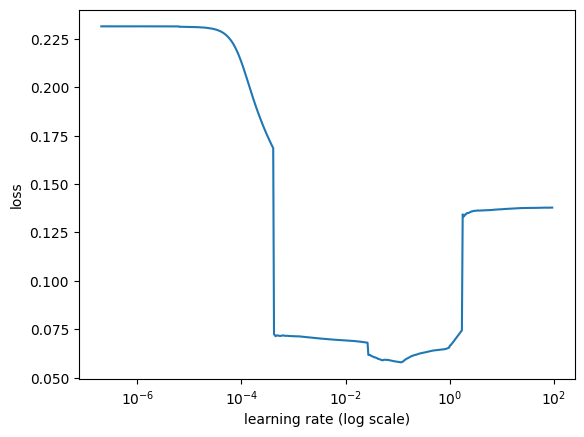

In [51]:
lr_finder = LRFinder(model)
lr_finder.find(x_train, x_train, start_lr=0.0000001, end_lr=100, batch_size=512, epochs=5)
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)
plt.show()

The plot tells us how loss changes with different learning rates. From this, we can infer that a good value for the starting learnig rate is a value that is approximately in the middle of the sharpest downward slope.